# 강남에서는 어떤 음식을 자주 시켜먹을까?

- 엘리스 12추차 화 수업 이론 코드 정리하기

In [72]:
import pandas as pd

In [73]:
df = pd.DataFrame()

```python
df.rename(columns={"a":"A"}, inplace=True)
df.drop_duplicates()
for i in range(len(dataframe.columns)):
    # dtatframe[i].drop_duplicate
    # 알고리즘에 따라 결과가 달라짐
```

- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [150]:
import pandas as pd
df = pd.read_csv('data/titanic_1/train.csv')
df.shape

(891, 12)

In [151]:
df.isnull().sum()
# df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
df_survived_sex = df[df['Survived'] == 1]['Sex']
df_unsurvived_sex = df[df['Survived'] == 0]['Sex']

In [154]:
print(df_survived_sex.value_counts())
print(df_unsurvived_sex.value_counts())

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


In [155]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts() #생존자를 카운트
    dead = df[df['Survived']==0][feature].value_counts() #사망자를 카운트
    temp = pd.DataFrame([survived, dead]) #[생존자,사망자]를 dataframe
    temp.index= ['Survived','Dead'] #index 화
    # temp.plot(kind = 'bar', stacked = True, figsize = (10,5)) #그림을 그림
    temp.plot(kind = 'bar', stacked = True, figsize = (10,5),
              color = ['#FFAAAA','#87CEFA']) #그림을 그림
    # #:hex color / 색의 혼합.
  

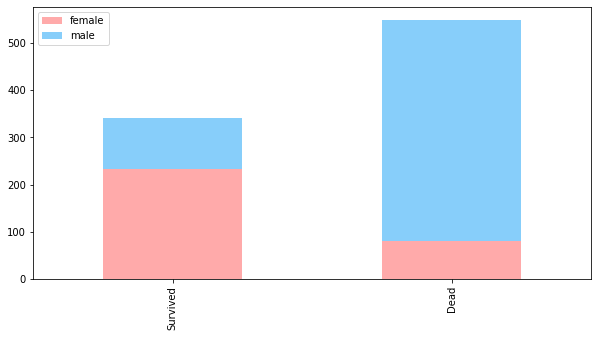

In [156]:
bar_chart("Sex")

In [157]:
# bar_chart("Pclass")

In [158]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [159]:
df['First_Name'] = df['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [160]:
df['Name'].str.extract('([A-Za-z]+)\,', expand = False)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

## 원 핫 인코딩

In [161]:
df['First_Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [162]:
# mapping 관계를 생성
# package로 도는 방법 -> sklearn

title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,
                'Ms':3,'Sir':3,'Don':3,'Countess':3,
                'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
df['Title'] = df['First_Name'].map(title_mapping)

In [163]:
df['Title']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

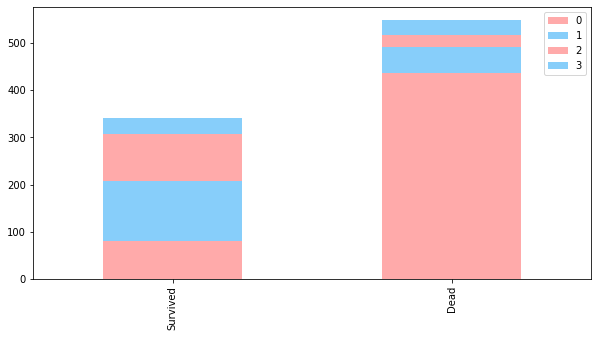

In [164]:
bar_chart("Title")

In [165]:
index = df.Age.isna()

In [166]:
df[index][["Name", "Age"]]

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
...,...,...
859,"Razi, Mr. Raihed",NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN
868,"van Melkebeke, Mr. Philemon",NaN
878,"Laleff, Mr. Kristo",NaN


In [167]:
df.Age.fillna(df.groupby("Title")["Age"].transform('median'), inplace= True)

In [168]:
df[index][["Name", "Age"]]

,Name,Age
5,"Moran, Mr. James",30.0
17,"Williams, Mr. Charles Eugene",30.0
19,"Masselmani, Mrs. Fatima",35.0
26,"Emir, Mr. Farred Chehab",30.0
28,"O'Dwyer, Miss. Ellen ""Nellie""",21.0
...,...,...
859,"Razi, Mr. Raihed",30.0
863,"Sage, Miss. Dorothy Edith ""Dolly""",21.0
868,"van Melkebeke, Mr. Philemon",30.0
878,"Laleff, Mr. Kristo",30.0


## 변수의 분포를 시각화

- 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할때 유용,
- Feactgrid : column, row, hue를 통한 의미구분을 통해 총 3차원 구현이 가능함
- aspect : subplot의 세로 대비 가로 비율

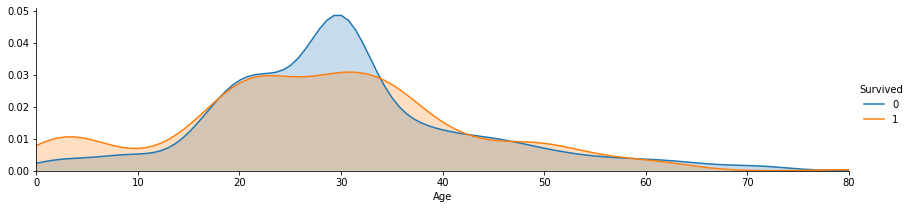

In [169]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) #kdeplot : 이차원 밀집도 그래프
facet.set(xlim = (0, df['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

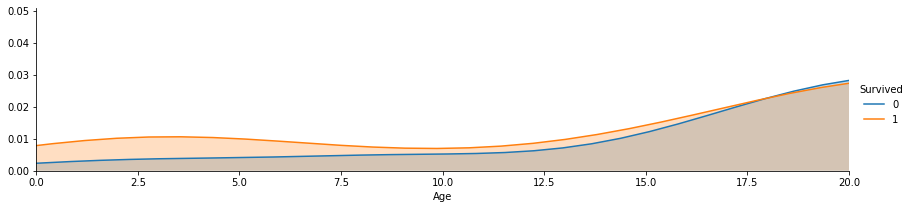

In [170]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) #kdeplot : 이차원 밀집도 그래프
facet.set(xlim = (0, df['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(0, 20)

plt.show()

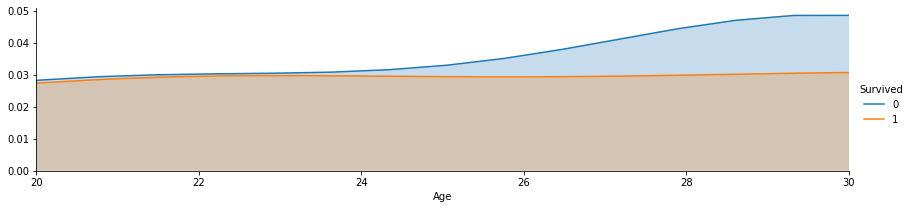

In [171]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) #kdeplot : 이차원 밀집도 그래프
facet.set(xlim = (0, df['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20, 30)

plt.show()

## 변수 구간화(Binning)
- 데이터 분석의 성능을 향상시키기 위해서 혹은 해석의 편리성을 위해 이산형 변수를 범주형 변수로 변환하는 것.
- 이산값을 평활화(smoothing)하여 단순한 이산 값으로 변환 시키는 기법을 사용함. 

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  First_Name   891 non-null    object 
 13  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [142]:
df["Age"].value_counts()

30.00    144
21.00     60
35.00     35
24.00     30
22.00     27
        ... 
66.00      1
70.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [118]:
df["Age"] = df.Age.apply(lambda x : 0 if x <= 16 else x)
df["Age"] = df.Age.apply(lambda x : 1 if 16 < x <= 32 else x)
df["Age"] = df.Age.apply(lambda x : 2 if 32 < x <= 48 else x)
df["Age"] = df.Age.apply(lambda x : 3 if 48 < x <= 64 else x)
df["Age"] = df.Age.apply(lambda x : 4 if 64 < x else x)
df["Age"] = df["Age"].map({0: "Child", 1: "Young", 2: "Middle", 3: "Prime", 4: "Old"}).astype(str)

In [191]:
for dataset in df:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 

PassengerId


AttributeError: 'str' object has no attribute 'loc'

In [188]:
for dataset in [df]:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [195]:
df.Age.value_counts()

Young     501
Middle    205
Child     105
Prime      69
Old        11
Name: Age, dtype: int64

## 파생변수

- famil_size
  - 함께 동승한 부모님과 아이들의 수와 형제, 배우자의 수
  - 혼자 탄거랑 가족들이랑 어떻게 다른가.

In [196]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'First_Name', 'Title'],
      dtype='object')

In [210]:
df["family_size"] = df.SibSp + df.Parch + 1

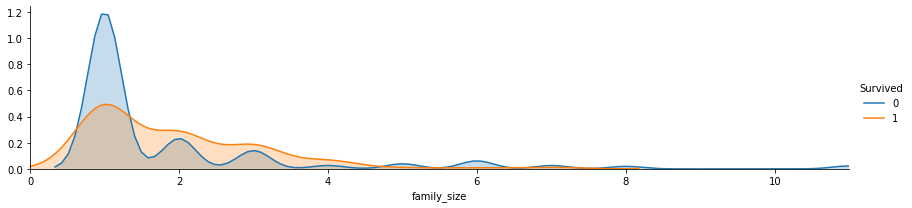

In [211]:
facet = sns.FacetGrid(df, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'family_size',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,df['family_size'].max()))
facet.add_legend()

plt.show()

# train test

In [212]:
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,
                'Ms':3,'Sir':3,'Don':3,'Countess':3,
                'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}

def pre(df):
    df['First_Name'] = df['Name'].str.extract('([A-Za-z]+)\.', expand = False)
    df['Title'] = df['First_Name'].map(title_mapping)
    df["family_size"] = df.SibSp + df.Parch + 1

    for dataset in [df]:
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
        dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
        dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [213]:
train = pd.read_csv('data/titanic_1/train.csv')
test = pd.read_csv('data/titanic_1/test.csv')


In [214]:
pre(train)
pre(test)

In [217]:
X_train = train.drop(['Survived','PassengerId'],axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId',axis = 1).copy()

In [218]:
X_test['Fare'].fillna(0,inplace = True)
X_test['Title'].fillna(0,inplace = True)
#Test에 대해서도 결측치가 있자만 강제로 0을 할당.

In [219]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Name',axis = 1, inplace = True)
X_test.drop('Name',axis = 1, inplace = True)

In [220]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Ticket',axis = 1, inplace = True)
X_test.drop('Ticket',axis = 1, inplace = True)

In [221]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Cabin',axis = 1, inplace = True)
X_test.drop('Cabin',axis = 1, inplace = True)

In [222]:
#원핫인코딩이 힘들어서 우선 포기
X_train.drop('Embarked',axis = 1, inplace = True)
X_test.drop('Embarked',axis = 1, inplace = True)

In [228]:
print(X_train.shape)
print(X_test.shape)

(891, 9)
(418, 9)


In [230]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [260]:
import statsmodels.api as sm

In [266]:
mod = sm.OLS(Y_train, X_train)
res = mod.fit()

In [267]:

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     26.84
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.70e-93
Time:                        15:07:16   Log-Likelihood:                -358.19
No. Observations:                 891   AIC:                             770.4
Df Residuals:                     864   BIC:                             899.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Pclass                 -0.1487    

In [231]:
from sklearn.linear_model import LinearRegression
# 데이터가 정렬되어있을 경우도 있기 때문에 데이터를 shuffle 해줌
from sklearn.utils import shuffle


lig_reg = LinearRegression()
lig_reg.fit(X_train,Y_train)

lig_reg.score(X_train,Y_train)

0.44682642647112925

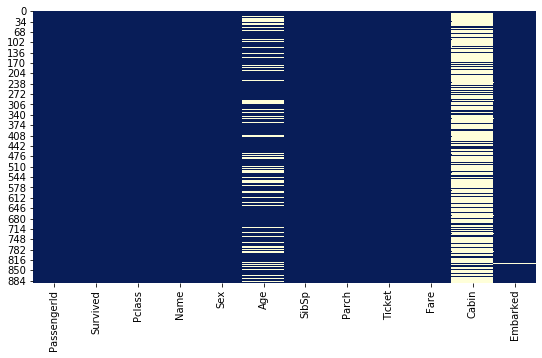

In [243]:
import seaborn as sns

df = pd.read_csv('data/titanic_1/train.csv')
fig,ax = plt.subplots(figsize = (9,5))
sns.heatmap(df.isnull(),cbar = False, cmap="YlGnBu_r")
plt.show()

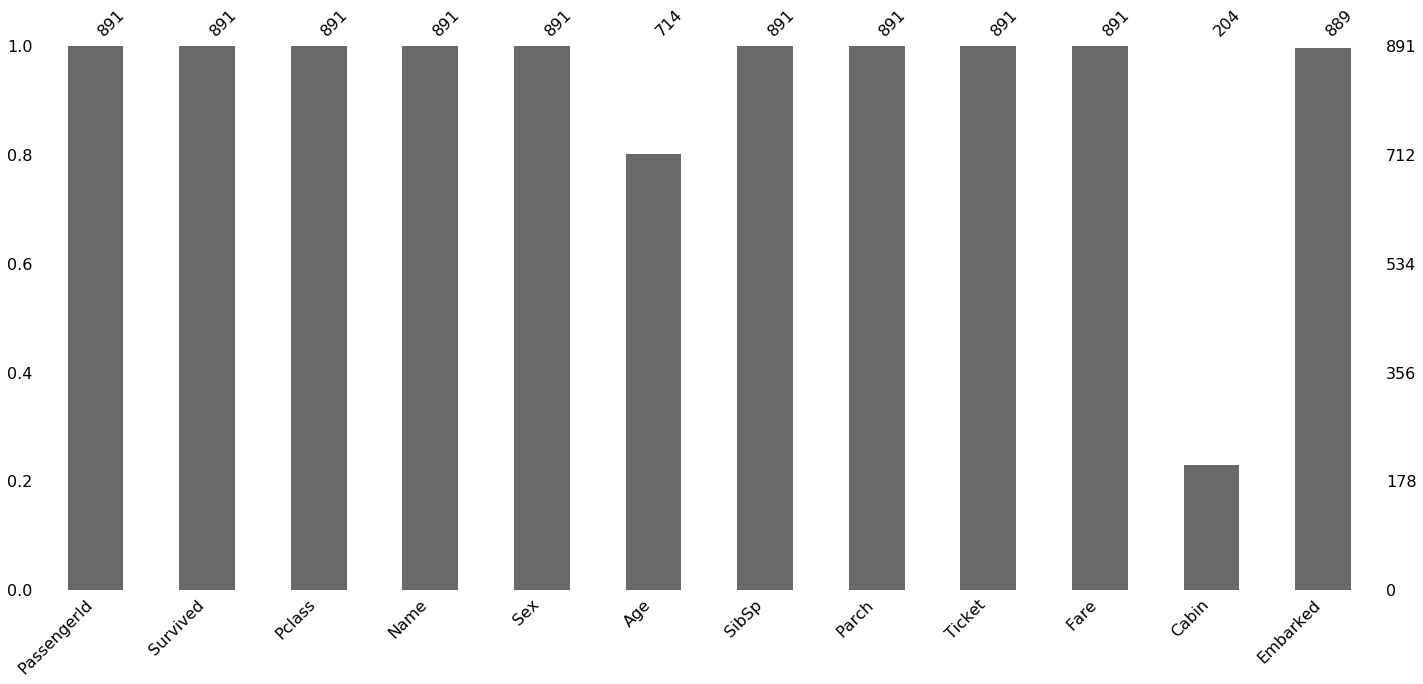

In [244]:
import missingno as msno
msno.bar(df)

In [245]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

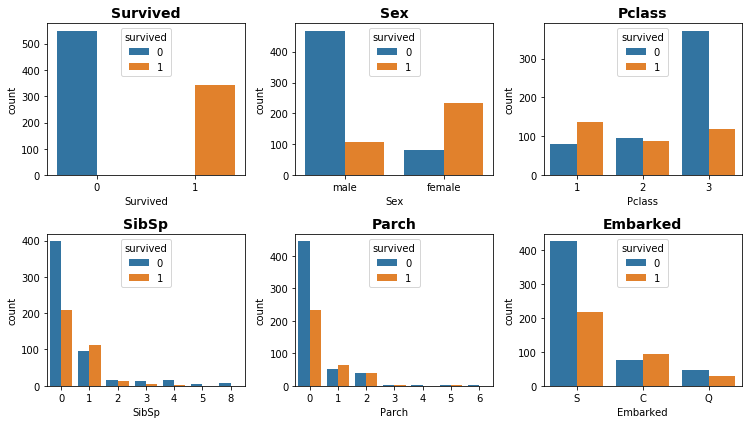

In [246]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df[cols[i]], hue=df["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()   

C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


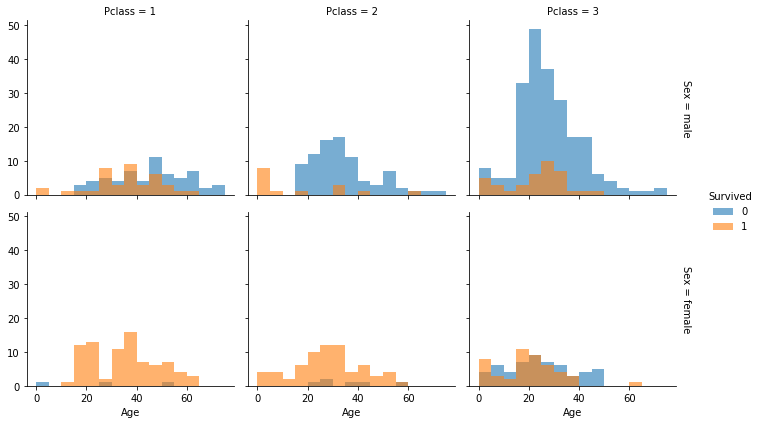

In [247]:
import numpy as np
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

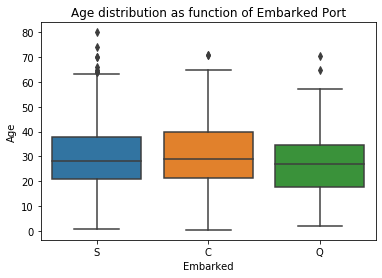

In [248]:
sns.boxplot(x='Embarked', y='Age', data=df)
plt.title("Age distribution as function of Embarked Port")
plt.show()

In [250]:
cm_surv = ["darkgrey" , "lightgreen"]

C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


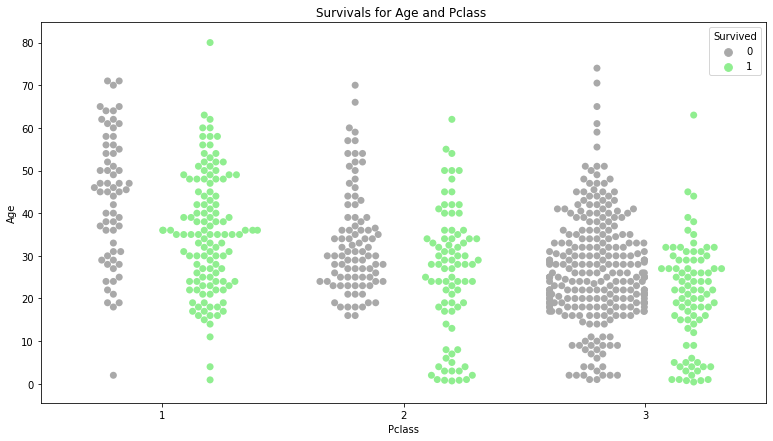

In [251]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=df , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

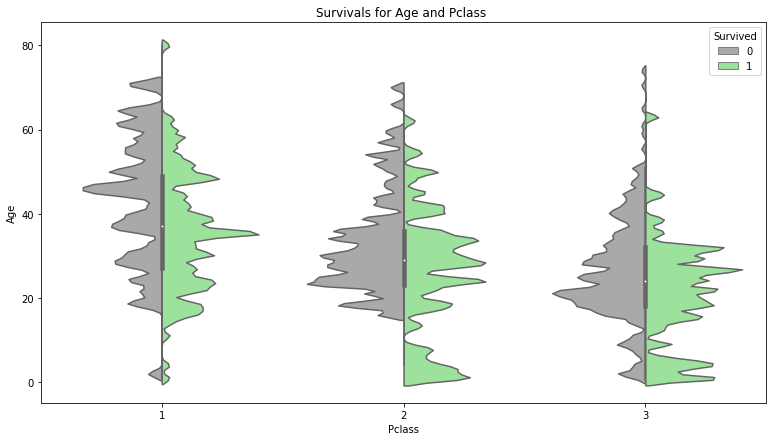

In [252]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ljkea\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points 

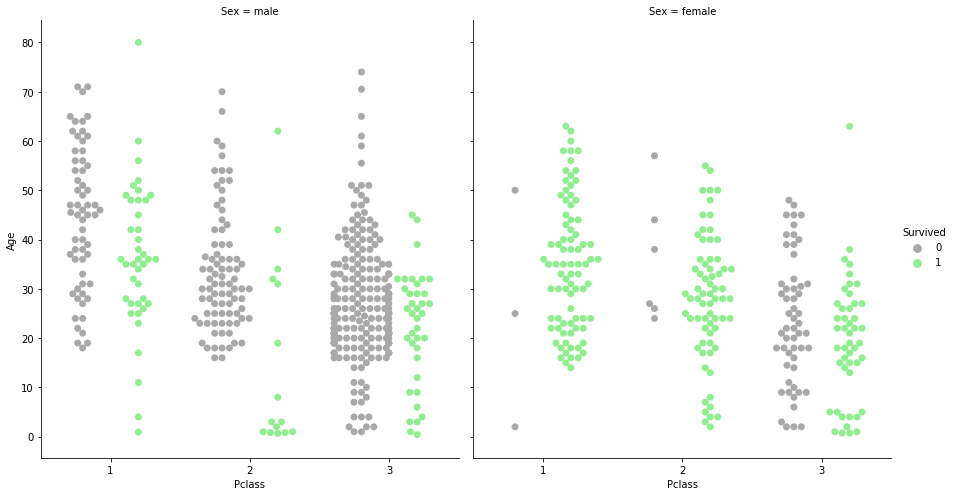

In [253]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df, kind="swarm", split=True, palette=cm_surv, size=7, aspect=.9, s=7)

In [7]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
ls_df = []
for c in df.columns:
    print(c)
    print()
    print(df[c].value_counts())
    print()

PassengerId

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

Survived

0    549
1    342
Name: Survived, dtype: int64

Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

Name

Lievens, Mr. Rene Aime            1
Maisner, Mr. Simon                1
Klasen, Mr. Klas Albin            1
McNamee, Mr. Neal                 1
Johnson, Mr. Alfred               1
                                 ..
Persson, Mr. Ernst Ulrik          1
Jermyn, Miss. Annie               1
Millet, Mr. Francis Davis         1
Kirkland, Rev. Charles Leonard    1
Hays, Miss. Margaret Bechstein    1
Name: Name, Length: 891, dtype: int64

Sex

male      577
female    314
Name: Sex, dtype: int64

Age

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

SibSp

0    608
1    209
2     28
4     18
3    

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
dummy = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

In [59]:
dummy = dummy.astype(str)

In [61]:
dummy = pd.get_dummies(dummy)

In [63]:
dummy.corr()

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
Survived_0,1.000000,-1.000000,-0.285904,-0.093349,0.322308,-0.543351,0.543351,0.115867,-0.173076,-0.029796,...,-0.134174,-0.075020,-0.033391,0.053002,0.028398,0.026456,-0.168240,-0.003650,0.155660,-0.060095
Survived_1,-1.000000,1.000000,0.285904,0.093349,-0.322308,0.543351,-0.543351,-0.115867,0.173076,0.029796,...,0.134174,0.075020,0.033391,-0.053002,-0.028398,-0.026456,0.168240,0.003650,-0.155660,0.060095
Pclass_1,-0.285904,0.285904,1.000000,-0.288585,-0.626738,0.098013,-0.098013,-0.058470,0.125673,-0.026838,...,0.018496,0.014713,-0.042496,0.001187,-0.042496,-0.018962,0.296423,-0.155342,-0.170379,0.083847
Pclass_2,-0.093349,0.093349,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.033099,0.077469,0.035244,...,0.062425,-0.005051,0.035908,-0.034258,-0.038324,-0.017100,-0.125416,-0.127301,0.192061,-0.024197
Pclass_3,0.322308,-0.322308,-0.626738,-0.565210,1.000000,-0.137143,0.137143,0.077316,-0.171329,-0.005560,...,-0.066741,-0.008566,0.007391,0.026859,0.067804,0.030255,-0.153329,0.237449,-0.009511,-0.052550
Sex_female,-0.543351,0.543351,0.098013,0.064746,-0.137143,1.000000,-1.000000,-0.203203,0.179339,0.042182,...,0.127636,0.170993,0.070383,0.020746,0.070383,0.045439,0.082853,0.074115,-0.125722,0.064296
Sex_male,0.543351,-0.543351,-0.098013,-0.064746,0.137143,-1.000000,1.000000,0.203203,-0.179339,-0.042182,...,-0.127636,-0.170993,-0.070383,-0.020746,-0.070383,-0.045439,-0.082853,-0.074115,0.125722,-0.064296
SibSp_0,0.115867,-0.115867,-0.058470,-0.033099,0.077316,-0.203203,0.203203,1.000000,-0.811408,-0.264017,...,-0.302415,-0.215801,-0.077838,-0.062369,-0.045565,-0.049132,-0.034759,0.055398,-0.007822,0.032360
SibSp_1,-0.173076,0.173076,0.125673,0.077469,-0.171329,0.179339,-0.179339,-0.811408,1.000000,-0.099714,...,0.229119,0.002173,0.064787,0.081687,0.064787,0.060551,0.092043,-0.066568,-0.035869,-0.026257
SibSp_2,-0.029796,0.029796,-0.026838,0.035244,-0.005560,0.042182,-0.042182,-0.264017,-0.099714,1.000000,...,0.062474,0.033439,0.072586,-0.012096,-0.013531,-0.006038,0.011850,0.013285,-0.017791,-0.008544


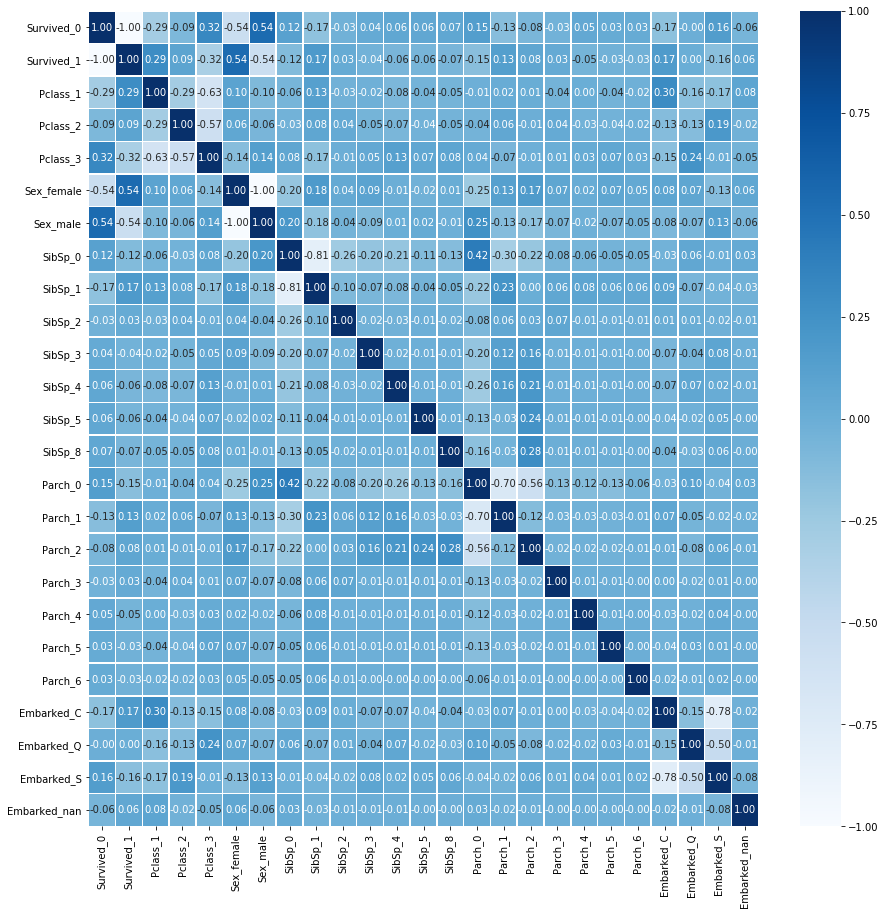

In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns  

plt.figure(figsize=(15,15))
sns.heatmap(data = dummy.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [274]:
df.Pclass.value_counts(ascending=)

3    491
1    216
2    184
Name: Pclass, dtype: int64